In [2]:
import tqdm as tqdm
import matplotlib.pyplot as plt

%matplotlib inline

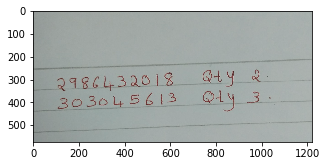

In [6]:
import cv2
import numpy as np
#import image
image = cv2.imread('h4.jpg')
plt.figure(figsize=(5,5))
plt.imshow(image)

In [7]:
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# plt.figure(figsize=(5,5))
# plt.imshow(gray)

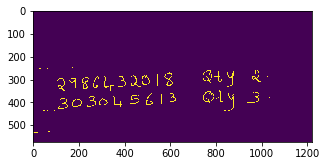

In [9]:
#binary
ret,thresh = cv2.threshold(gray,120,255,cv2.THRESH_BINARY_INV)
plt.figure(figsize=(5,5))
plt.imshow(thresh)

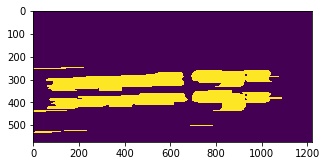

In [10]:
#dilation
kernel = np.ones((1,100), np.uint8)

img_dilation = cv2.dilate(thresh, kernel, iterations=1)
plt.figure(figsize=(5,5))
plt.imshow(img_dilation)

In [11]:
#find contours
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
#sort contours
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

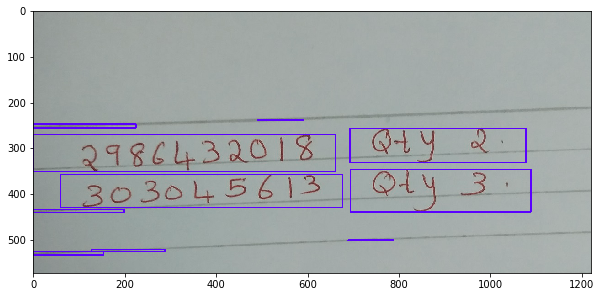

In [13]:
k = []
image = image
for i, ctr in enumerate(sorted_ctrs):
    # Get bounding box
    x, y, w, h = cv2.boundingRect(ctr)

    # Getting ROI
    roi = image[y:y+h, x:x+w]

    # show ROI
#     cv2.imshow('segment no:'+str(i),roi)
    k.append(roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
#     cv2.waitKey(0)

plt.figure(figsize=(10,10))
plt.imshow(image)

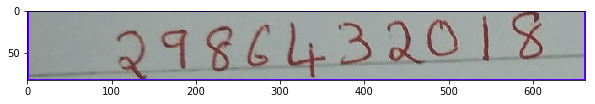

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(k[2])

In [23]:
im = k[2]

In [24]:
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

error: C:\bld\opencv_1510966172919\work\opencv-3.3.0\modules\core\src\matrix.cpp:981: error: (-215) dims <= 2 && step[0] > 0 in function cv::Mat::locateROI
